# Video Game Sales By G26
This dataset contains a list of video games with sales greater than 100,000 copies. The fields include a ranking of overall sales, the name of the video game, the platform it was released on, the year it was released, genre of the game, publisher of the game, North American sales, European sales, Japanese sales, sales from the rest of the world and global sales, all of which are counted in terms in millions.

This dataset includes categorical data such as the name of the video game, the video game’s platform, genre, and publisher as well as numerical data such as its sales across the globe and its total global sales.




## Collection Process
The dataset used was collected using a scraping script obtained from [Github](https://github.com/GregorUT/vgchartzScrape), which was then published on [Kaggle](https://www.kaggle.com/gregorut/videogamesales) where we obtained the dataset. Due to how the data from vgchartz is gathered there may be some discrepancies to the actual sales of the game. The dataset shows how much a game has sold for a specific platform, games with several platforms appear in the dataset multiple times.

### Data Implications

### Imported Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Video Game Data
Each row in the dataset represents a particular video game released on or before the year 2020. Each column represents a variable which contain values of a particular datatype.There are a total of 16,598 observations in the dataset and 11 variables. The dataset is composed of only a single csv file hence no merging is needed.

In [ ]:
games = pd.read_csv('vgsales.csv')

If the csv file is viewed in Excel. One can see the dataset contains 16,598 observations and 11 variables. The following are the descriptions for each variable.
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#Rank is not equal to Name since there are similar games that are released in different Platforms.
games.nunique(axis = 0)

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

### Cleaning of Dataset

First we check for any null values.

In [ ]:
games.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Year and Publisher have null values and only contains a small portion of the dataset so can be safely dropped.

In [ ]:
null = games.columns[games.isnull().any()].tolist()
games[null].isnull().sum()

Year         271
Publisher     58
dtype: int64

There is a Publisher "Unknown" which are invalid values.

In [ ]:
games['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [ ]:
(games['Publisher']=='Unknown').sum()

203

In [ ]:
games = games[games.Publisher != 'Unknown']
(games['Publisher']=='Unknown').sum()

0

In [ ]:
games = games.dropna(subset=['Year','Publisher'])

In [ ]:
games.isnull().any()

Check for any duplicate observations in the dataset.

In [ ]:
duplicate = games.duplicated()
print("Number of duplicates:" + str(duplicate.sum()))

Number of duplicates:0


The Dataset was last updated at 2017 so any game beyond that may be due to invalid input of date, fortunately it is only a small subset that were invalid.

In [ ]:
games = games[games.Year < 2017]
(games['Year'] > 2017).sum()

0

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16187 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16187 non-null  int64  
 1   Name          16187 non-null  object 
 2   Platform      16187 non-null  object 
 3   Year          16187 non-null  float64
 4   Genre         16187 non-null  object 
 5   Publisher     16187 non-null  object 
 6   NA_Sales      16187 non-null  float64
 7   EU_Sales      16187 non-null  float64
 8   JP_Sales      16187 non-null  float64
 9   Other_Sales   16187 non-null  float64
 10  Global_Sales  16187 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


411 observations were deleted from cleaning the dataset.

### End of Cleaning

## EDA questions
1. What is the best performing platform of all time based on global sales?
1. Is there a trend of global sales and regional sales throughout the years?
1. What is the split in proportion of genres is the video game industry?

In [ ]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
games['Name'].value_counts().loc[lambda x : x>6].to_frame()

,Name
Need for Speed: Most Wanted,12
LEGO Marvel Super Heroes,9
Ratatouille,9
FIFA 14,9
Monopoly,8
Angry Birds Star Wars,8
Madden NFL 08,8
Cars,8
LEGO Star Wars II: The Original Trilogy,8
Madden NFL 07,8


### EDA Question 1:

In [ ]:
games["Platform"].value_counts().sort_values(ascending = False)

PS2     2124
DS      2108
PS3     1294
Wii     1278
X360    1230
PSP     1190
PS      1187
PC       919
XB       803
GBA      780
GC       541
3DS      494
PSV      402
PS4      334
N64      316
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

#### Short Analysis
It Appears that PS2 has the largest amount of games in the dataset, while PCFX has the smallest amount, only having one game.

Text(0.5, 1.0, 'Total of Global Sales')

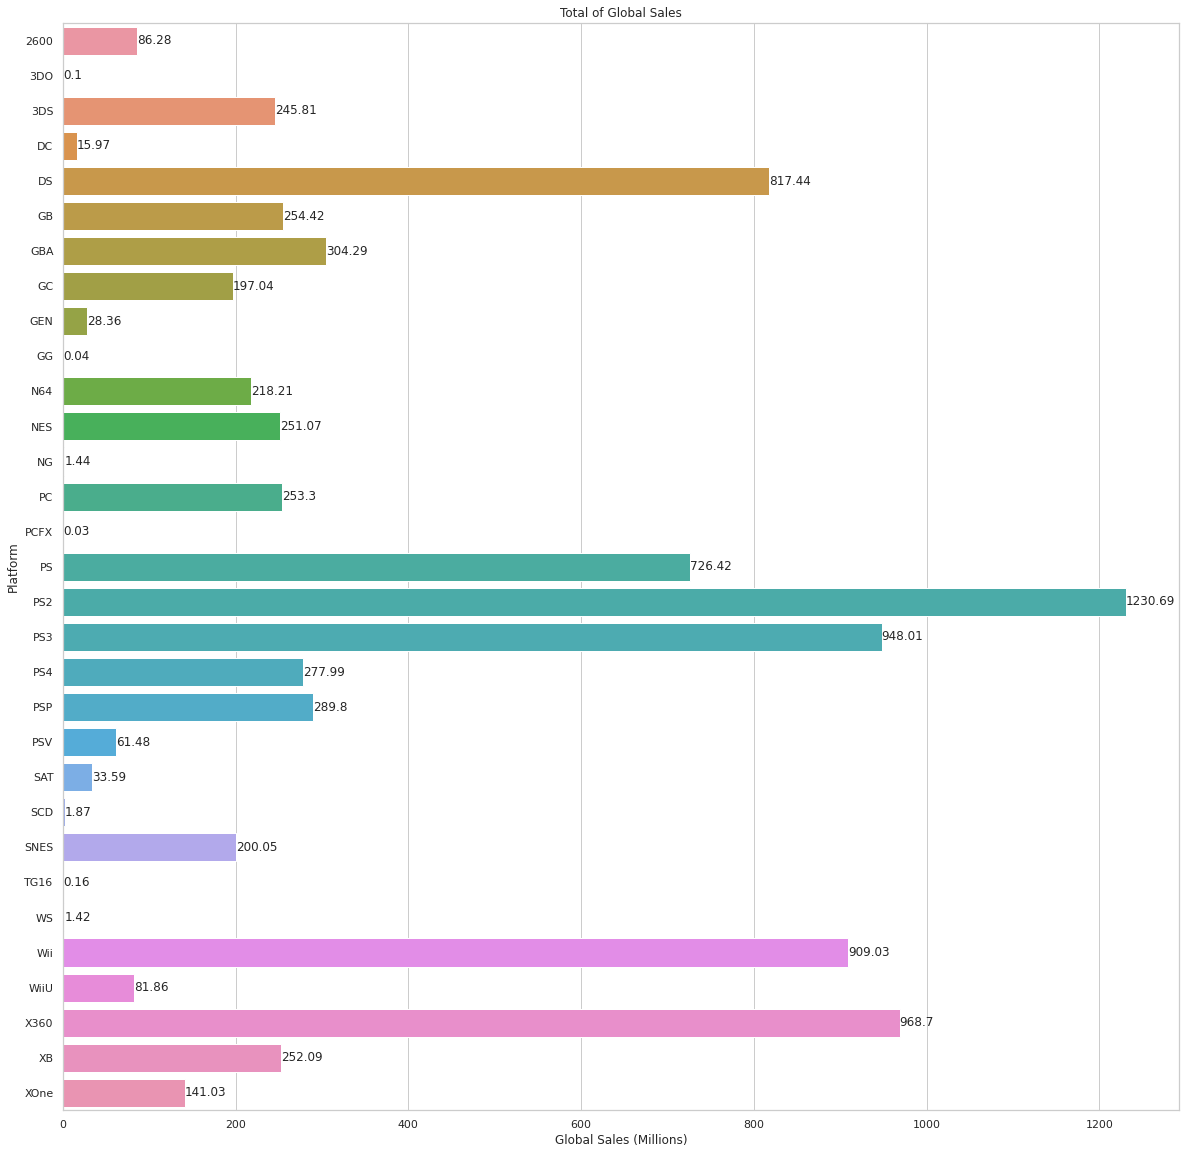

In [ ]:
games_temp = games.groupby(games.Platform)["Global_Sales"].sum()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,20)) 
ax = sns.barplot(y=games_temp.index,x=games_temp.values)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Global Sales (Millions)")
ax.set_title("Total of Global Sales")


In [ ]:
games.groupby("Platform")["Global_Sales"].sum().sort_values(ascending = False)

Platform
PS2     1230.69
X360     968.70
PS3      948.01
Wii      909.03
DS       817.44
PS       726.42
GBA      304.29
PSP      289.80
PS4      277.99
GB       254.42
PC       253.30
XB       252.09
NES      251.07
3DS      245.81
N64      218.21
SNES     200.05
GC       197.04
XOne     141.03
2600      86.28
WiiU      81.86
PSV       61.48
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

#### Analysis
It appears that PS2 has the largest amount of sales despite being an younger platform compared to other platforms that are older and have also been well received from the market. This may be due it being one of the first platforms allowing "couch-play" as compared to its predecessors.

Text(0.5, 1.0, 'Average of Global Sales')

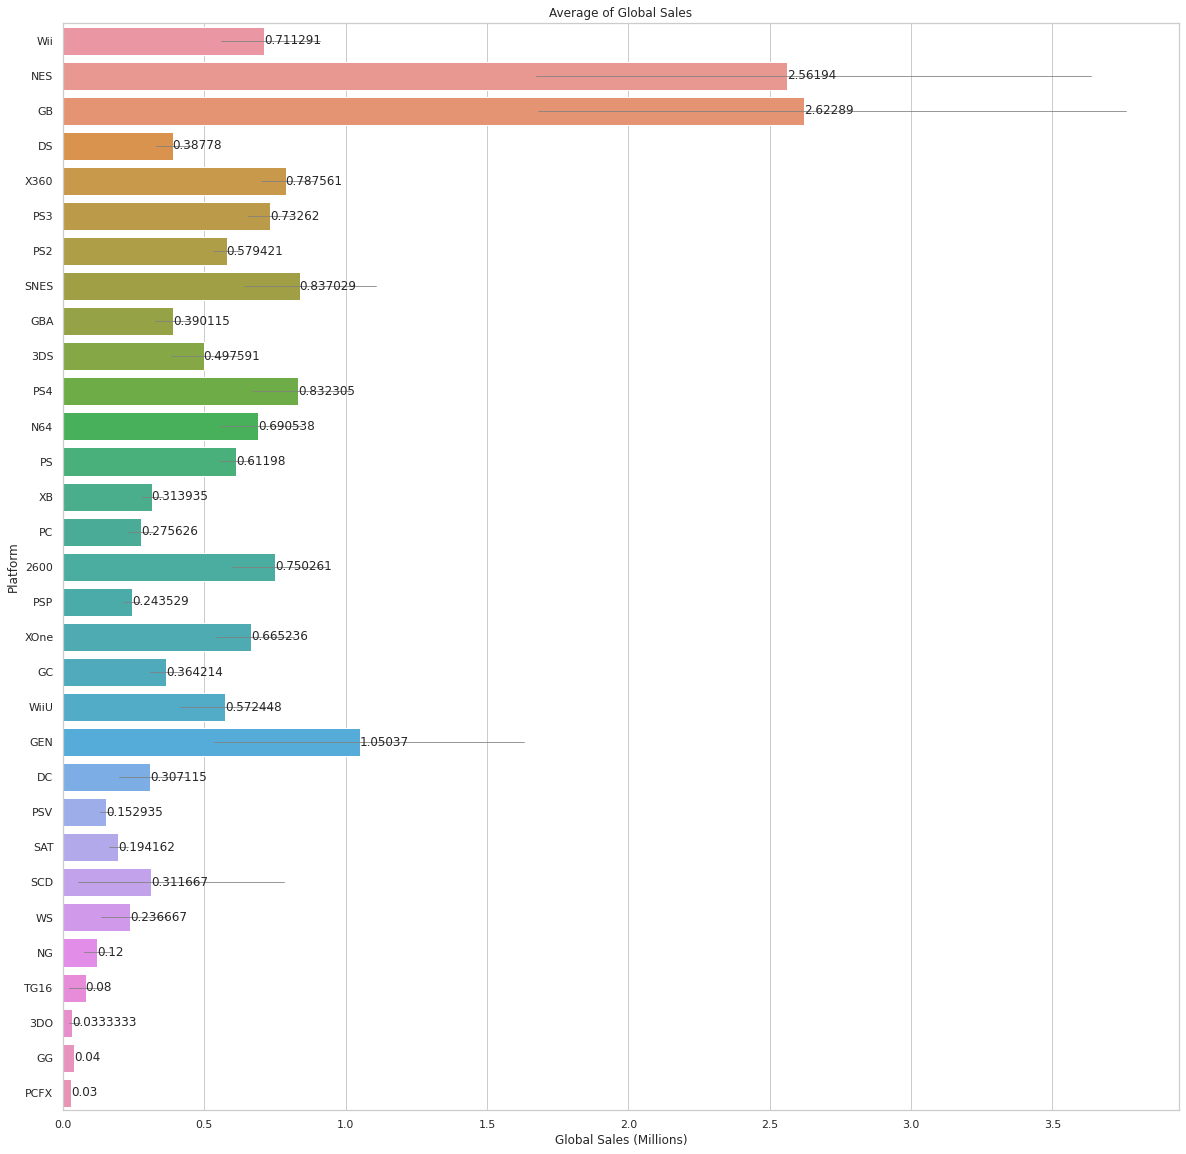

In [ ]:
# Wii and some other platforms are prolly bugged?
# Changed Scaling to Hundred Millions for X Label
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,20)) 
ax = sns.barplot(x="Global_Sales",y="Platform",data = games,errcolor="Gray",errwidth = .8)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Global Sales (Millions)")
ax.set_title("Average of Global Sales")

In [ ]:
games.groupby("Platform")["Global_Sales"].mean().sort_values(ascending = False)

Platform
GB      2.622887
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.832305
X360    0.787561
2600    0.750261
PS3     0.732620
Wii     0.711291
N64     0.690538
XOne    0.665236
PS      0.611980
PS2     0.579421
WiiU    0.572448
3DS     0.497591
GBA     0.390115
DS      0.387780
GC      0.364214
XB      0.313935
SCD     0.311667
DC      0.307115
PC      0.275626
PSP     0.243529
WS      0.236667
SAT     0.194162
PSV     0.152935
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64

In [ ]:
games.loc[games["Platform"] == "GB"].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64


#### Average of Sales based on Platform
It appears that the Gameboy has the best average of sales among the games, being able to provide to a large audience with its variety of genres and it being one of the first handheld consoles, allowing people to play it on the go, along with most of its top scoring games either be classics such as Tetris or the famous Pokemon series.

### EDA Question 2

(1980.0, 2018.0)

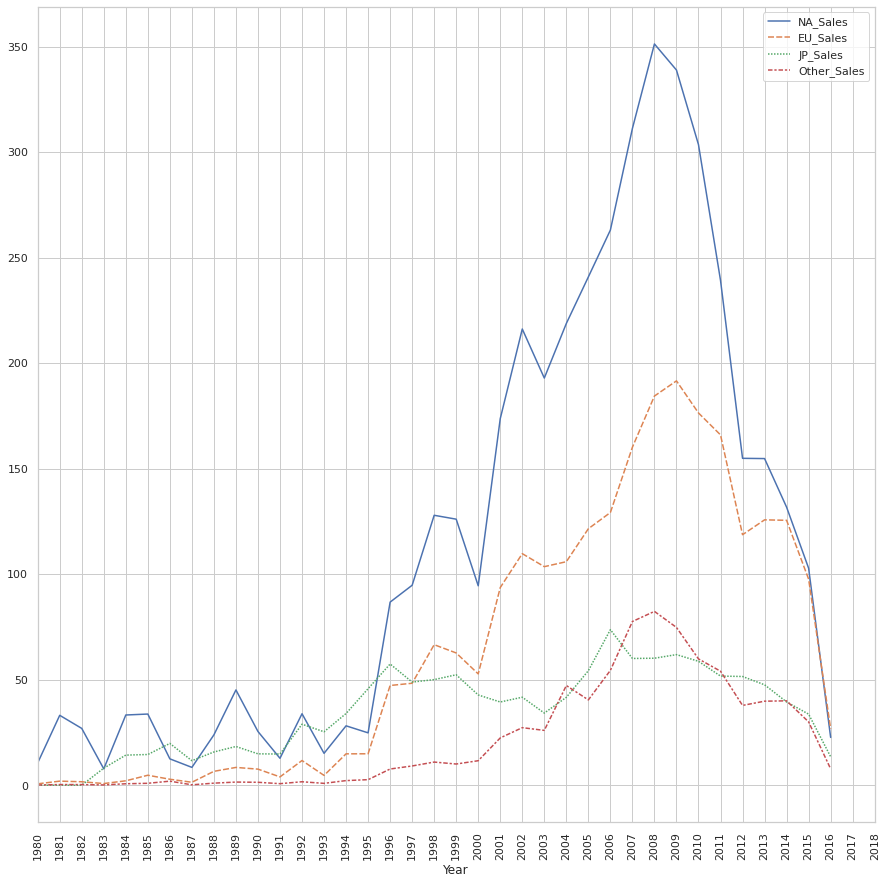

In [ ]:
games_temp = games.groupby(["Year"]).sum()
games_temp.drop(columns = ["Global_Sales","Rank"],inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,15)) 
ax = sns.lineplot(data = games_temp)
ax.set_xticks(range(1980,2020))
plt.xticks(rotation = 90)
ax.set_xlim(1980,2018)

(1980.0, 2018.0)

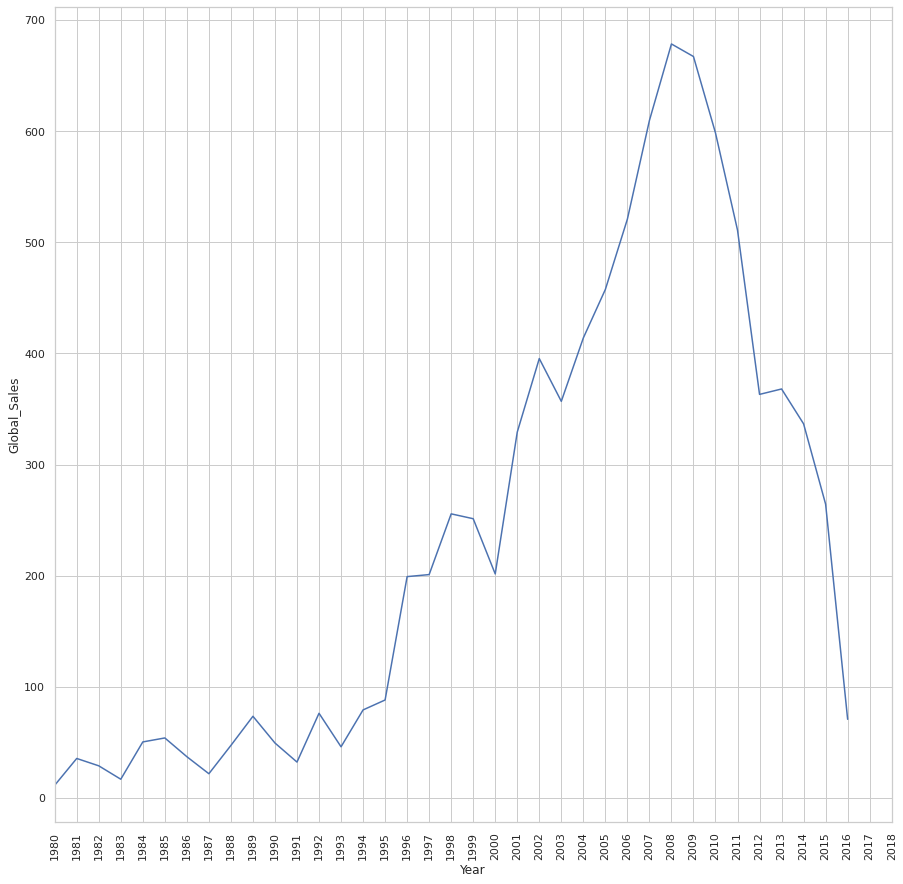

In [ ]:
games_temp = games.groupby(["Year"])["Global_Sales"].sum()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,15)) 
ax = sns.lineplot(data = games_temp)
ax.set_xticks(range(1980,2020))
plt.xticks(rotation = 90)
ax.set_xlim(1980,2018)


In [ ]:
games.drop(columns = ["Rank"]).groupby(["Year"]).sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.13,1.94,0.00,0.32,35.48
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,33.73,4.74,14.56,0.92,53.94
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


#### Analysis
After further research on the spikes, most spikes are generally caused by a platform or a group of platforms that are said to be anticipated in those years. An example is at 2008, the highest peak of the graph, is when the Xbox 360,PS3, and Wii were released. Furthermore, regardless of the impact of North America in the Video Game industry, each of the specified regions, follow the trend where spikes are correlated to the release of consoles. This is seen in both regional and global sales.

### Eda Question 3

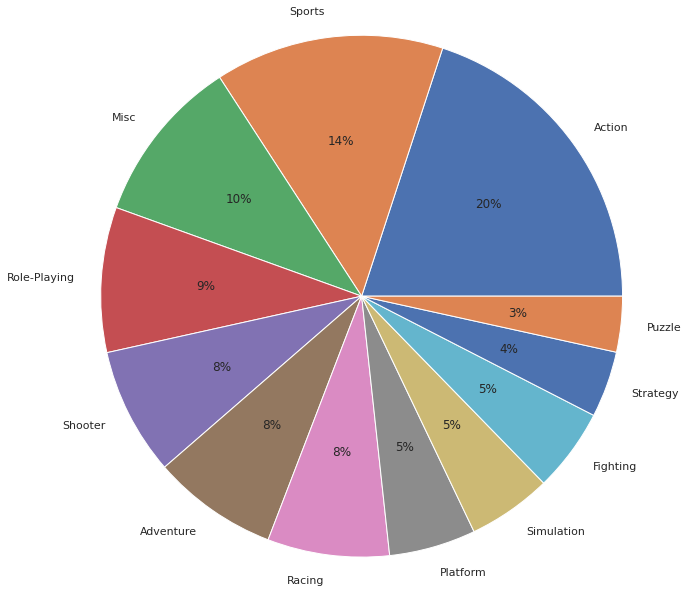

In [ ]:
genres = games["Genre"].value_counts()
labels = ["Action","Sports","Misc","Role-Playing",
          "Shooter","Adventure","Racing","Platform","Simulation","Fighting","Strategy","Puzzle" ]

plt.pie(genres, labels = labels,autopct='%.0f%%',radius = 3)
plt.show()

In [ ]:
numerical = genres.to_frame()
percentages = (numerical / numerical.sum()) * 100
numerical["Percent"] = percentages
numerical

,Genre,Percent
Action,3233,19.972818
Sports,2297,14.190400
Misc,1671,10.323099
Role-Playing,1455,8.988695
Shooter,1279,7.901402
Adventure,1261,7.790202
Racing,1222,7.549268
Platform,870,5.374683
Simulation,842,5.201705
Fighting,835,5.158460


It appears that action takes the largest portion of the video game industry, this is not surpising considering how common the genre of actions games are. This is followed by the sports genre, this may be due to all the different titles such as the "Nba sports", and other world cup games.

## Summary of EDA

 #### 1.What is the best performing platform of all time based on global sales?
 The best selling platform is PS2, but it having large variances in the sales, meanwhile Gameboy (GB) has the best average selling games as a platform. The large lead of PS2 in total amount of sales is due to it's large collection of games over the other platforms. Though the PS2 has the most games, not many of its games were considered a "hit" showing a large disparity to its best performing games and least performing games. This may be due to the hype brought by the release many developers tried to develop games for it oversaturating the market for the consumers, causing only the best of the best to stand out from the rest.

#### 2. Is there a trend of global sales and regional sales throughout the years?
All regional sales follow the trend of global sales, having similar spikes in their graph. The spikes represent the platform(s) anticipated to be released during those years, 2008 being the highest as some of the most popular platforms were released that year. Among all the regions, North America contributes the most to global sales which may be due to the number of publishers present in the region. It's also interesting to note that Japan, despite being a country, contributes nearly as much as the Other Sales (which is represented as the rest of the world excluding,the regions part of the dataset).

#### 3. What is the split in proportion of genres is the video game industry?
The biggest proportion of games are under the genre of action, while the smallest portion goes to puzzle games. The second biggest would be sports which may be attributed to a new version of each game being released yearly (e.g. NBA2K). One of the potential reasons why action is a big genre may be due to its wide category of what could be considered an action game as most modern games would usually have multiple genres built into it, and action may hit multiple of those genres. It also being one of the most favored genres could be a reason why publishers or developers put a game under such a category, for the majority of people to notice it immediately.

## Research Questions
1. Is there a difference of performance between the platforms of the Playstation family based on global sales? <br> 
    To see the stability of the playstation market and if there is a decline or incline in the playstation franchise.
***
2. Is the genre division of each platform representative of the video game's genre division as a whole? <br>
    To see which platforms are more geared towards specific genres

## Statisical Inference

#### Research  Question 1:
__Null Hypothesis__: There is no difference in performance of the platforms in the playstation family. <br>
__Alternative Hypothesis__: There is a difference in performance of the platorms in a the playstation family.

In [ ]:
psfam_summary = games.loc[games['Platform'].str.contains("PS")].groupby(["Platform"])["Global_Sales"].describe()
psfam_summary.head(10)


,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
PS,1187.0,0.611980,1.057781,0.01,0.105,0.26,0.6600,10.95
PS2,2124.0,0.579421,1.138954,0.01,0.080,0.23,0.5600,20.81
PS3,1294.0,0.732620,1.428830,0.01,0.110,0.29,0.7975,21.40
PS4,334.0,0.832305,1.622708,0.01,0.060,0.22,0.8200,14.24
PSP,1190.0,0.243529,0.525206,0.01,0.030,0.09,0.2300,7.72
PSV,402.0,0.152935,0.255171,0.01,0.030,0.06,0.1675,2.25


First, We need to get the F-Distribution

In [ ]:
psfam_summary["count"].sum()
SSG = 0
SST = 0
psfam_mean = (games.loc[games['Platform'].str.contains("PS")].groupby(["Platform"])['Global_Sales'].mean()).mean()

for ( cur_idx,cur_row) in psfam_summary.iterrows():
        SSG += (cur_row["count"] * (cur_row["mean"] - psfam_mean) **2)
print(SSG)

252.42315314320547


In [ ]:
psfam_sales = games.loc[games['Platform'].str.contains("PS")]["Global_Sales"]
SST = 0
for (cur_idx,cur_row) in psfam_sales.iteritems():
    SST += (cur_row - psfam_mean)**2
print(SST)

8204.093444942346


In [ ]:
MSG = SSG/ (psfam_summary.shape[0] -1)
print(MSG)

50.48463062864109


In [ ]:
MSE = (SST - SSG)/ (psfam_sales.shape[0] - psfam_summary.shape[0])
print("MSE: {:.5f}".format(MSE))

## F Statistic
F = MSG/MSE
print("F Statistic: {:.5f}".format(F))

MSE: 1.21865
F Statistic: 41.42679


Using this [P-Value Calculator](https://www.socscistatistics.com/pvalues/fdistribution.aspx) the p-value that was obtained is 0.00001. The p-value(0.00001) is statistically significant at signifiance levels 0.01,0.05,and 0.10. Since the p-value(0.00001) is less than the significance levels mentioned above, the null hypothesis is **rejected**.

### Research Question 2:
__Null Hypothesis__: The platforms are representative of the video game industry as a whole.<br>
__Alternative Hypothesis__: The platforms are not representative of the video game industry as a whole.

In [ ]:
df_g_genre = games.groupby(["Genre"])["Platform"].value_counts()
df_g_genre = df_g_genre.unstack()
df_g_genre = df_g_genre.fillna(0)

#df_g_genre = df_g_genre.append(games["Platform"].value_counts())
df_g_genre

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,54.0,0.0,176.0,3.0,334.0,6.0,161.0,98.0,3.0,0.0,...,3.0,0.0,12.0,0.0,0.0,229.0,63.0,317.0,152.0,68.0
Adventure,1.0,1.0,35.0,11.0,233.0,5.0,36.0,20.0,2.0,0.0,...,26.0,0.0,4.0,1.0,0.0,82.0,3.0,47.0,26.0,12.0
Fighting,1.0,0.0,14.0,12.0,36.0,0.0,23.0,42.0,5.0,0.0,...,31.0,0.0,25.0,0.0,0.0,41.0,5.0,65.0,44.0,7.0
Misc,5.0,0.0,53.0,0.0,385.0,8.0,86.0,35.0,1.0,0.0,...,15.0,2.0,17.0,0.0,0.0,269.0,21.0,120.0,45.0,15.0
Platform,9.0,0.0,28.0,2.0,88.0,18.0,138.0,73.0,7.0,1.0,...,5.0,1.0,26.0,0.0,0.0,56.0,16.0,24.0,49.0,4.0
Puzzle,8.0,1.0,19.0,0.0,230.0,15.0,36.0,12.0,0.0,0.0,...,5.0,0.0,13.0,0.0,0.0,54.0,4.0,6.0,7.0,0.0
Racing,4.0,0.0,10.0,6.0,66.0,2.0,64.0,60.0,1.0,0.0,...,8.0,1.0,9.0,0.0,0.0,91.0,3.0,102.0,122.0,19.0
Role-Playing,0.0,0.0,85.0,4.0,193.0,21.0,73.0,24.0,3.0,0.0,...,17.0,1.0,50.0,0.0,4.0,35.0,6.0,74.0,23.0,13.0
Shooter,22.0,0.0,6.0,3.0,42.0,1.0,40.0,48.0,1.0,0.0,...,22.0,0.0,10.0,1.0,0.0,59.0,10.0,197.0,124.0,33.0


In [ ]:
df_total = df_g_genre.sum(axis=0)##total of each platform
df_exp_prop = (df_g_genre.sum(axis=1) /games.shape[0] )

In [ ]:
chx = 0

for (cur_idx , cur_row) in df_g_genre.iterrows():
    for( cur_col, cur_val) in cur_row.items():
        chx += ((cur_val - df_total[cur_col] * df_exp_prop[cur_idx])** 2)/ games.shape[0]
print(chx)

26.13644672607943


Using this [calculator](https://www.socscistatistics.com/pvalues/chidistribution.aspx) a p-value of 1 was obtained. This may be due to the large degree of freedom that the dataset holds. The p-value(1) is statistically unsignificant at significance levels 0.01,0.05,and 0.10. Since the p-value (1) is greater than all of the significance levels mentioned, the null hypothesis is **accepted**.

## Insights and Conclusions

The data provides strong evidence that there is a difference in the performances of the playstation family at a significance level of 1%, 5% and 10%. This shows that throughout the years, one of the platforms released by playstation differs in terms of their contribution to the global sales. As previously mentioned, the PS2 is the best selling platform, but the other platforms from the playstation family didn't appeal to the market as much. Furthermore, one can perform pairwise comparisons across all six of the to truly figure out which of the playstation platforms had a difference in performance compared to the others. We opted not to do this since we would have to perform close to 15 pairwise comparisons that would take up a lot of space in this project. Although we may be able to make an educated guess by seeing that the PSV (Playstation Vita) had the lowest performance in terms of total global sales which could have caused the difference in performance. 

The data also provides strong evidence that the platforms are representative of the video game industry as a whole. This shows, while each platform has advantages over other platforms in certain genres such as a shooting game on a PC, or racing for any couch console, this does not stop the developers from creating games to a less ergonomic environment and would usually tend to make up for the disadvantage through in-game assistance. Furthermore, as seen in the data, each platform has relatively the same proportion of games for each genre. With both action and sports being the most popular genres, which may be attributed to the design/controls of the platforms being well suited to these genres.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f77a54ea-b9f1-4391-911c-b8ee367ec1e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>